<h1 align="center">Volume 4: River Crossing.</h1>

    Jane Emeline Slagle
    Section 1 and done
    2/23/23

In [37]:
import numpy as np
import scipy.integrate as si
from autograd import grad
from scipy import optimize
from matplotlib import pyplot as plt
from scipy.interpolate import barycentric_interpolate

# Problem 1
Assume that the current is given by $c(x) = −
\frac{7}{10} (x^2 − 1)$. (This function assumes, for example, that the current is faster near the center of the river.) Write a Python
function that accepts as arguments a function $y$, its derivative $y'$, and an $x$-value, and returns $L(x, y(x), y'(x))$ (where $T[y]=\int^1_{-1} L(x,y(x),y'(x))dx$ Use that function to defune a second
function that numerically computes $T[y]$ for a given path $y(x)$.

In [38]:
c = lambda x: (-7/10)*((x**2)-1)
alph = lambda x: (1-c(x)**2)**(-1/2)

#1st func: want return L(x, y(x), y'(x))
def L(x, y, dy):
    #use equation 19.3 to get L 
    return alph(x)*np.sqrt(1+(alph(x)**2)*(dy(x)**2)) - (alph(x)**2)*(c(x))*(dy(x))

#2nd func: uses 1st L func to find T[y] (integral of L)
def T(y):
    #want get integral from -1 to 1
    return si.quad(L, -1, 1, args = (y, grad(y)))

# Problem 2

Let y(x) be the straight-line path between A = (−1, 0) and B = (1, 5). Numerically calculate T[y] to get an upper bound on the minimum time required to cross from A to
B. Using (18.2), find a lower bound on the minimum time required to cross.

In [39]:
#get line equation connecting pts. A, B
y = lambda x: (5/2)*(x+1)

#get the upper and lower bounds:
upper = T(y)[0]

#lower bound given by graph of 1/sec from -1 to 1
#so it's integral -1 to 1 w/ 1 dx which is 2 (graphed on desmos and saw this!)
lower = 2

print(upper, lower)

3.877082049138412 2


# Problem 3

Numerically solve the Euler-Lagrange equation (18.4), using c(x) = −
7
10 (x
2 − 1)
and α = (1 − c
2
)
−1/2
, and y(−1) = 0, y(1) = 5.
Hint: Since this boundary value problem is defined over the doimain [−1, 1], it is easy to
solve using the pseudospectral method. Begin by replacing each d
dx with the pseudospectral
differentiation matrix D. Then impose the boundary conditions and solve.

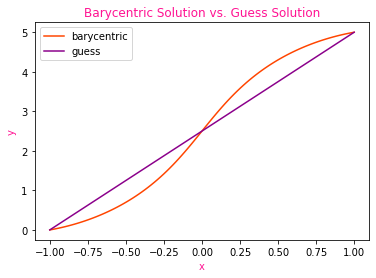

In [61]:
#need previous eqs used in past problems for c, alpha and y
c = lambda x: (-7/10)*((x**2)-1)
alph = lambda x: (1-c(x)**2)**(-1/2)
y = lambda x: (5/2)*(x+1)

#get this function from spectral 1 lab:
#want use this bc use D that is returned in it to get the derivative need in equation 19.4
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

#get equation 19.4 in this func: use D from cheb func to take the deriv
def F(U):
    f = D@((alph(x)**3)*(D@U)*
          ((1+(alph(x)**2)*((D@U)**2))**(-1/2))
          -((alph(x)**2)*(c(x))))
    
    #these have to do w/ the given boundary condts:
    f[0] = U[0] - 5
    f[-1] = U[-1]
    
    return f

#want numerically solve this so need to get the solution from barycentric values like how did in spectral 1 lab
D, x = cheb(50)
x_vals = np.linspace(-1, 1, 100)
guess = y(x)
solution = optimize.root(F, guess).x
barycentric = barycentric_interpolate(x, solution, x_vals)

#Quinlan put on slack to plot it so plot that sucker!
plt.plot(x_vals, barycentric, label = "barycentric", color = "orangered")
plt.plot(x, guess, label = "guess", color = "darkmagenta")
plt.title("Barycentric Solution vs. Guess Solution", color = "deeppink")
plt.legend(loc = "best")
plt.xlabel("x", color = "deeppink")
plt.ylabel("y", color = "deeppink")
plt.show()

# Problem 4

Plot the angle at which the boat should be pointed at each $x$-coordinate. (Hint: use Equation 1.1; see Figure 1.3. Note that the angle the boat should be steered is NOT described by the tangent vector to the trjaectory)

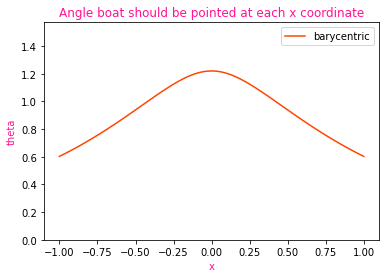

In [62]:
#get the same 3 equations as before:
c = lambda x: (-7/10)*((x**2)-1)
alph = lambda x: (1-c(x)**2)**(-1/2)
y = lambda x: (5/2)*(x+1)

#get cheb(N) func from spectral1 lab again:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

#do equation 19.1 (take existing func from spectral 1 and modify it to give us what we want)
def F(U):
    #modify f via eq. 19.1:
    f = D @ solution - np.tan(U) - c(x)/np.cos(U)
    
    return f

#get solution via barycentric stuff again just like how did in prob 3:
x_vals = np.linspace(-1, 1, 100)
guess = np.zeros(len(x))
solution = optimize.root(F, guess).x
barycentric = barycentric_interpolate(x, solution, x_vals)

#Quinlan put on slack to plot it so plot that sucker!
plt.plot(x_vals, barycentric, label = "barycentric", color = "orangered")
plt.title("Angle boat should be pointed at each x coordinate", color = "deeppink")
plt.legend(loc = "best")
plt.xlabel("x", color = "deeppink")
plt.ylabel("theta", color = "deeppink")
plt.ylim(0, np.pi/2)
plt.show()